In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('Maintenance.csv', index_col = 0)
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [4]:
data['Machine failure'].unique()

array([0, 1], dtype=int64)

In [5]:
data = data.drop('Product ID', axis = 1)
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [6]:
data2 = pd.get_dummies(data['Type'])
data2

,H,L,M
UDI,,,
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
...,...,...,...
9996,0,0,1
9997,1,0,0
9998,0,0,1


In [8]:
data2 = pd.get_dummies(data, prefix=['col1'])
data2

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,col1_H,col1_L,col1_M
UDI,,,,,,,,,,,,,,
1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0,0,1
9997,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1,0,0
9998,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0,0,1


In [9]:
data2.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,col1_H,col1_L,col1_M
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688,-0.023025,0.006676,0.007958
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279,-0.017967,0.005564,0.005831
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088,-0.001171,0.004735,-0.004296
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136,-0.004978,0.001191,0.001991
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326,-0.002787,0.008232,-0.006976
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516,-0.023916,0.035643,-0.022432
TWF,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970,0.011739,-0.007843,0.000690
HDF,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706,-0.011035,0.013402,-0.007095
PWF,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273,-0.015541,0.004209,0.005690
OSF,0.001988,0.004554,-0.104575,0.183465,0.155894,0.531083,0.038243,0.046396,0.115836,1.000000,-0.004341,-0.026458,0.058434,-0.045138


In [21]:
data.corr()

C:\Users\harivars\AppData\Local\Temp\ipykernel_18404\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273
OSF,0.001988,0.004554,-0.104575,0.183465,0.155894,0.531083,0.038243,0.046396,0.115836,1.000000,-0.004341


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Machine failure          10000 non-null  int64  
 6   TWF                      10000 non-null  int64  
 7   HDF                      10000 non-null  int64  
 8   PWF                      10000 non-null  int64  
 9   OSF                      10000 non-null  int64  
 10  RNF                      10000 non-null  int64  
 11  col1_H                   10000 non-null  uint8  
 12  col1_L                   10000 non-null  uint8  
 13  col1_M                   10000 non-null  uint8  
dtypes: float64(3), int64(8

The columns **TWF, HDF, PWF, OSF** has high correlations with the **Machine failure** column. So, only these columns will be quite sufficient for further analysis.

In [22]:
data3 = data2[['TWF', 'HDF', 'PWF', 'OSF', 'Machine failure']]
data3

,TWF,HDF,PWF,OSF,Machine failure
UDI,,,,,
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
...,...,...,...,...,...
9996,0,0,0,0,0
9997,0,0,0,0,0
9998,0,0,0,0,0


In [23]:
data3.corr()

,TWF,HDF,PWF,OSF,Machine failure
TWF,1.000000,-0.007332,0.008577,0.038243,0.362904
HDF,-0.007332,1.000000,0.018443,0.046396,0.575800
PWF,0.008577,0.018443,1.000000,0.115836,0.522812
OSF,0.038243,0.046396,0.115836,1.000000,0.531083
Machine failure,0.362904,0.575800,0.522812,0.531083,1.000000


<Axes: title={'center': 'Machine failure'}>

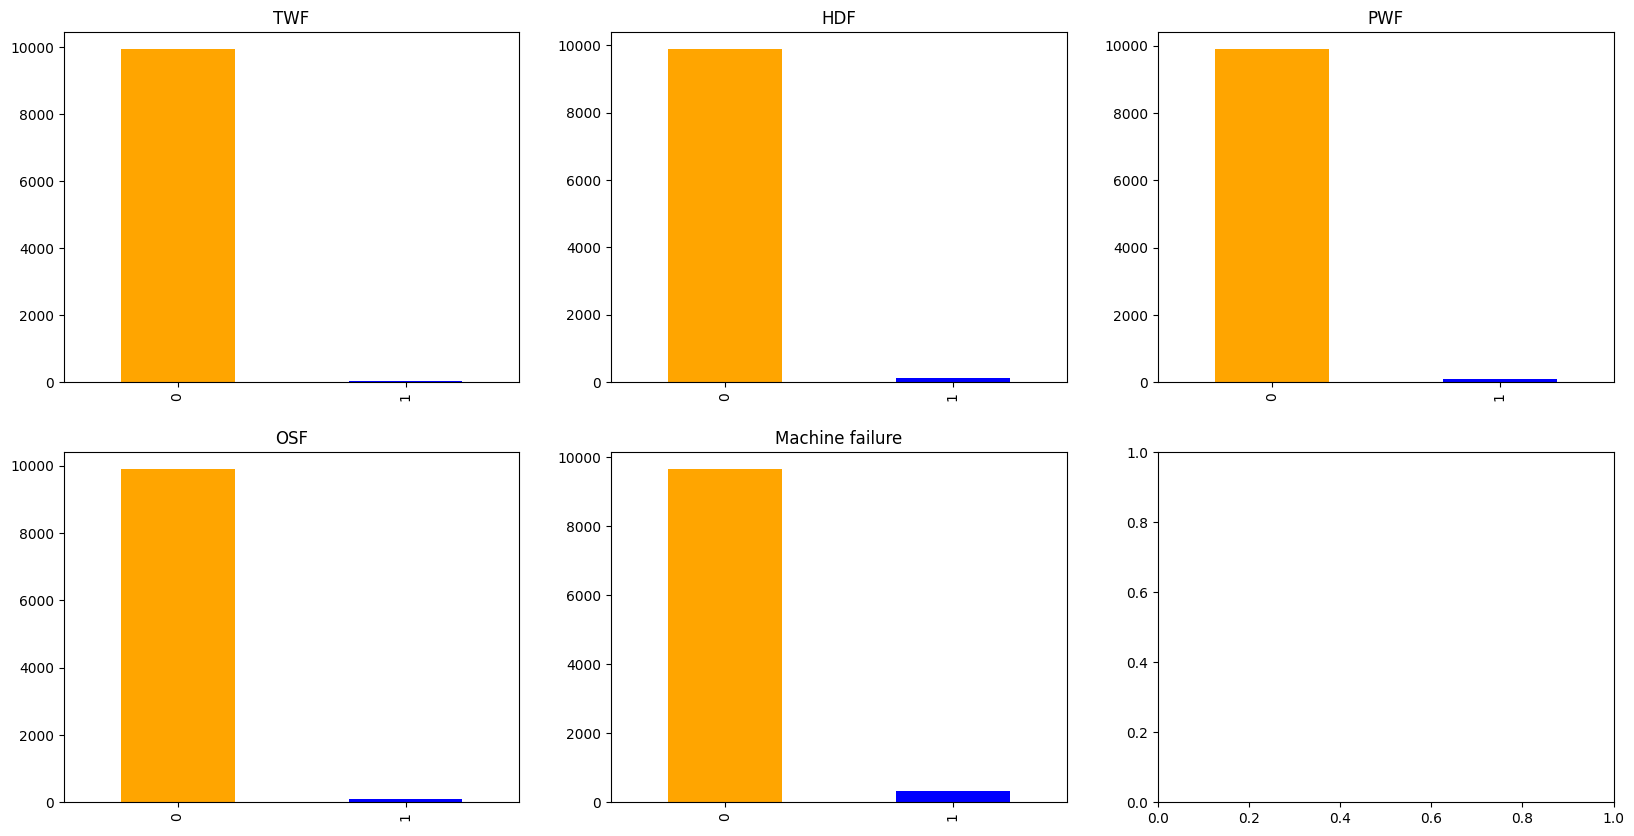

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
data3['TWF'].value_counts().plot(kind='bar', ax = axes[0,0], title = 'TWF', color = ['orange', 'blue', 'green'])
data3['HDF'].value_counts().plot(kind='bar', ax = axes[0,1], title = 'HDF', color = ['orange', 'blue', 'green'])
data3['PWF'].value_counts().plot(kind='bar', ax = axes[0,2], title = 'PWF', color = ['orange', 'blue', 'green'])
data3['OSF'].value_counts().plot(kind='bar', ax = axes[1,0], title = 'OSF', color = ['orange', 'blue', 'green'])
data3['Machine failure'].value_counts().plot(kind='bar', ax = axes[1,1], title = 'Machine failure', color = ['orange', 'blue', 'green'])

<Axes: xlabel='OSF'>

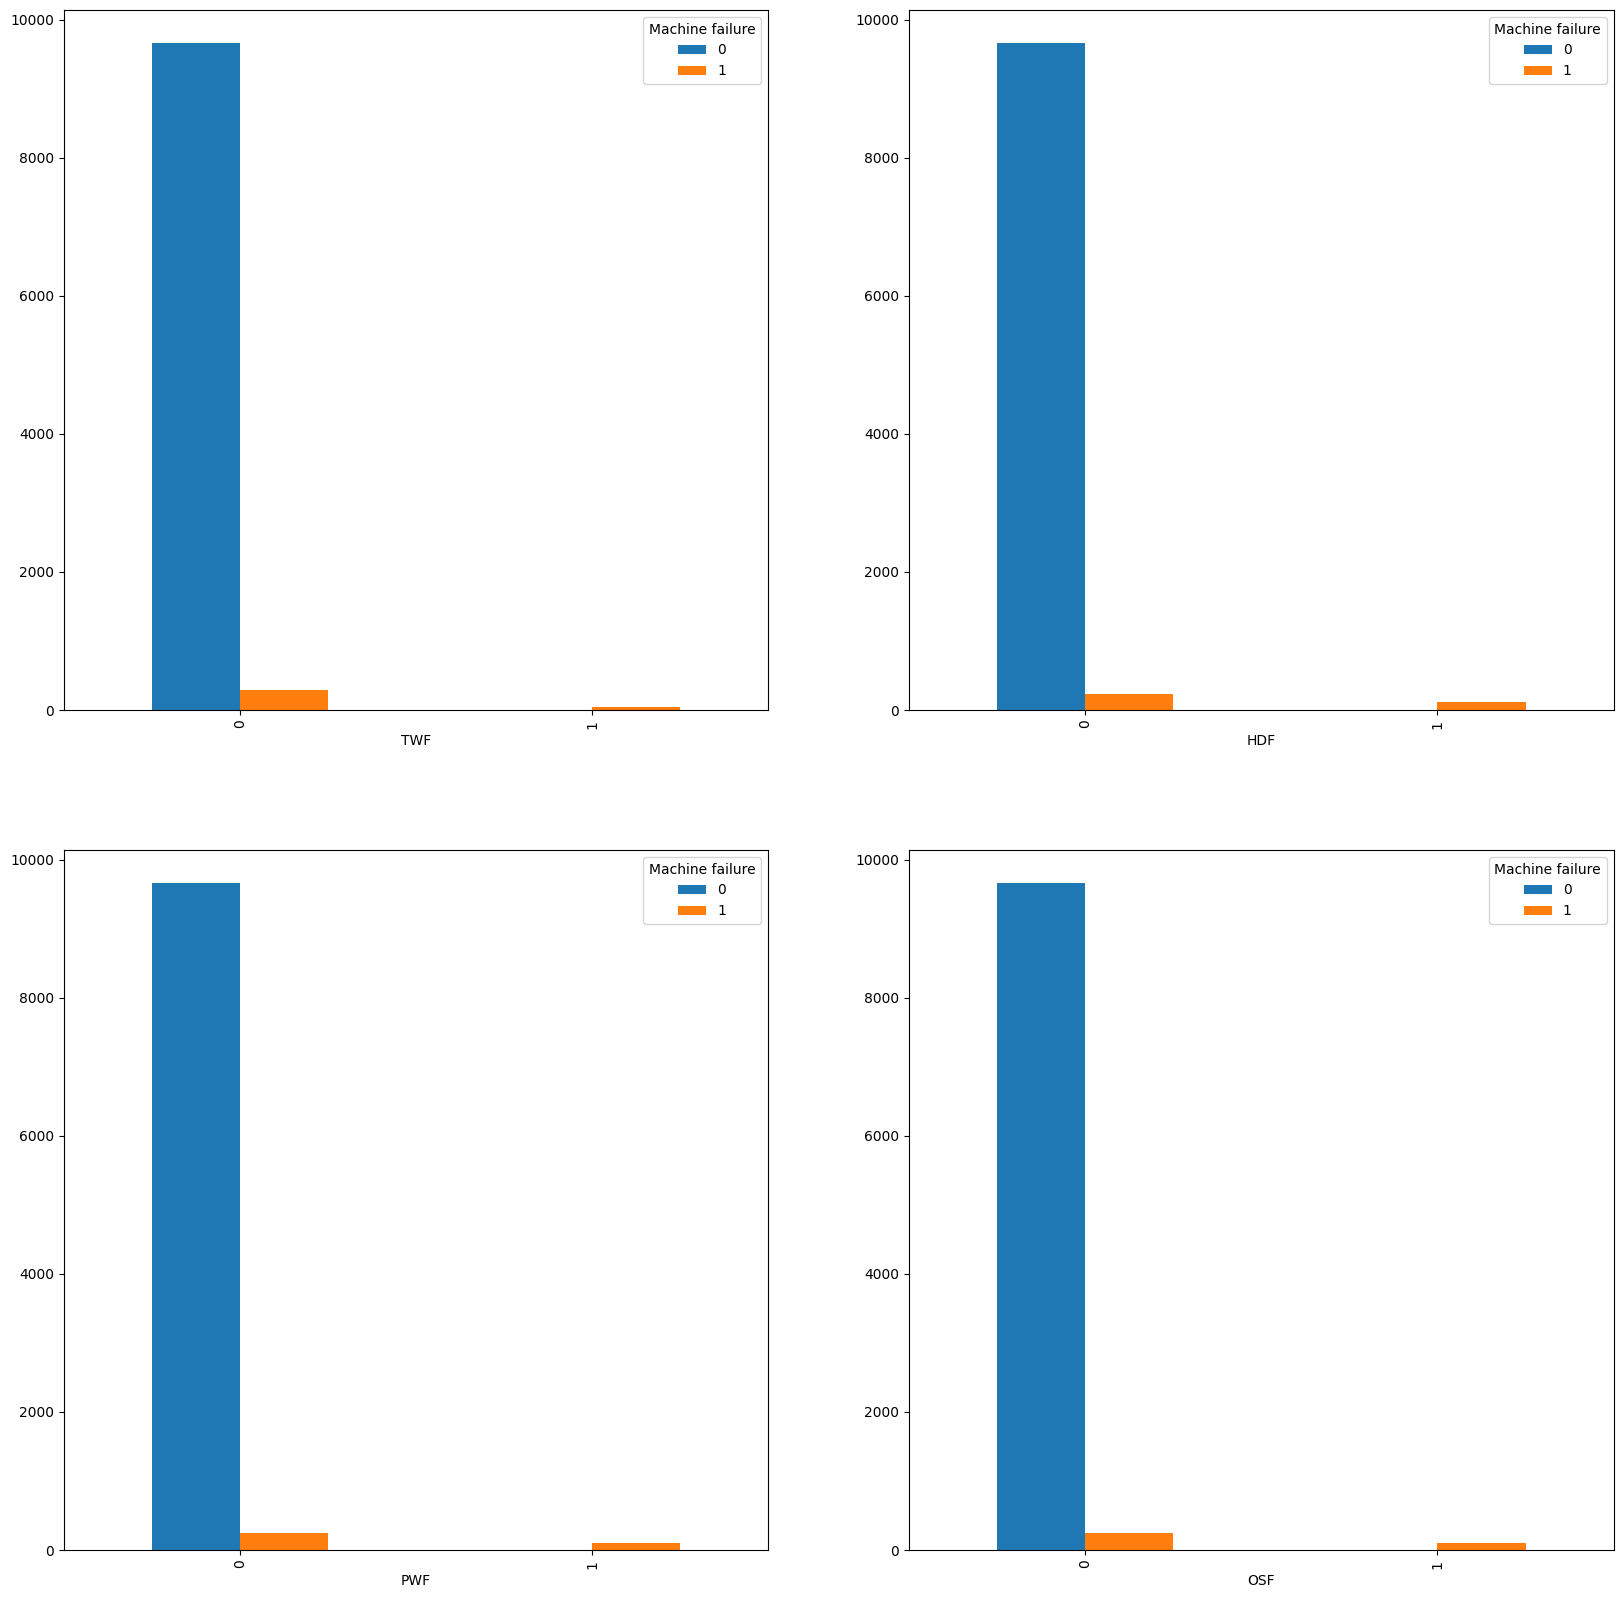

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
pd.crosstab(data3['TWF'], data3['Machine failure']).plot(kind = 'bar', ax = axes[0,0])
pd.crosstab(data3['HDF'], data3['Machine failure']).plot(kind = 'bar', ax = axes[0,1])
pd.crosstab(data3['PWF'], data3['Machine failure']).plot(kind = 'bar', ax = axes[1,0])
pd.crosstab(data3['OSF'], data3['Machine failure']).plot(kind = 'bar', ax = axes[1,1])

-------------

From the cross tabs also we can see a high correlation between the Machine failure column and these four columns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, classification_report, roc_auc_score, roc_curve

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [26]:
x = data3.drop('Machine failure', axis = 1)
y = data3[['Machine failure']]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [28]:
log.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
y_pred_train = log.predict(x_train)
y_pred_test = log.predict(x_test)

log_train_acc = accuracy_score(y_train, y_pred_train)
log_test_acc = accuracy_score(y_test, y_pred_test)

log_train_f1 = f1_score(y_train, y_pred_train)
log_test_f1 = f1_score(y_test, y_pred_test)

log_train_prec = precision_score(y_train, y_pred_train)
log_test_prec = precision_score(y_test, y_pred_test)

log_train_roc = roc_auc_score(y_train, y_pred_train)
log_test_roc = roc_auc_score(y_test, y_pred_test)

log_train_cm = confusion_matrix(y_train, y_pred_train)
log_test_cm = confusion_matrix(y_test, y_pred_test)

print('Logistic Regression training accuracy is', log_train_acc)
print('Logistic Regression testing accuracy is', log_test_acc)
print('--------------------------------------------------------')
print('Logistic Regression training F1 Score is', log_train_f1)
print('Logistic Regression testing F1 Score is', log_test_f1)
print('--------------------------------------------------------')
print('Logistic Regression training Precision is', log_train_prec)
print('Logistic Regression testing Precision is', log_test_prec)
print('--------------------------------------------------------')
print('Logistic Regression training ROC-AUC Score is', log_train_roc)
print('Logistic Regression testing ROC-AUC Score is', log_test_roc)
print('--------------------------------------------------------')
print('Logistic Regression training Confusion Matrix is')
print(log_train_cm)
print('--------------------------------------------------------')
print('Logistic Regression testing Confusion Matrix is')
print(log_test_cm)

Logistic Regression training accuracy is 0.999
Logistic Regression testing accuracy is 0.99925
--------------------------------------------------------
Logistic Regression training F1 Score is 0.9855072463768115
Logistic Regression testing F1 Score is 0.988235294117647
--------------------------------------------------------
Logistic Regression training Precision is 1.0
Logistic Regression testing Precision is 1.0
--------------------------------------------------------
Logistic Regression training ROC-AUC Score is 0.9857142857142858
Logistic Regression testing ROC-AUC Score is 0.9883720930232558
--------------------------------------------------------
Logistic Regression training Confusion Matrix is
[[5790    0]
 [   6  204]]
--------------------------------------------------------
Logistic Regression testing Confusion Matrix is
[[3871    0]
 [   3  126]]


In [35]:
data3.to_csv('Maintenance_final.csv')

In [36]:
data2.to_csv('Maintenance_enc.csv')